In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("/content/drive/My Drive/Dataset/DATA5050"))

['.ipynb_checkpoints', 'cell_images']


In [0]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

In [9]:
terinfeksi_data = os.listdir('/content/drive/My Drive/Dataset/DATA5050/cell_images/Terinfeksi/')
print(terinfeksi_data[:10]) #the output we get are the .png files

tidakTerinfeksi_data = os.listdir('/content/drive/My Drive/Dataset/DATA5050/cell_images/TidakTerinfeksi/')
print('\n')
print(tidakTerinfeksi_data[:10])

['C33P1thinF_IMG_20150619_114756a_cell_181.png', 'C33P1thinF_IMG_20150619_114756a_cell_180.png', 'C33P1thinF_IMG_20150619_114756a_cell_182.png', 'C33P1thinF_IMG_20150619_114756a_cell_179.png', 'C33P1thinF_IMG_20150619_115740a_cell_163.png', 'C33P1thinF_IMG_20150619_115740a_cell_162.png', 'C33P1thinF_IMG_20150619_115740a_cell_161.png', 'C33P1thinF_IMG_20150619_115808a_cell_205.png', 'C33P1thinF_IMG_20150619_115808a_cell_206.png', 'C33P1thinF_IMG_20150619_120645a_cell_215.png']


['C1_thinF_IMG_20150604_104722_cell_15.png', 'C1_thinF_IMG_20150604_104722_cell_9.png', 'C1_thinF_IMG_20150604_104722_cell_60.png', 'C1_thinF_IMG_20150604_104722_cell_81.png', 'C1_thinF_IMG_20150604_104722_cell_79.png', 'C1_thinF_IMG_20150604_104722_cell_66.png', 'C1_thinF_IMG_20150604_104722_cell_73.png', 'C1_thinF_IMG_20150604_104722_cell_123.png', 'C1_thinF_IMG_20150604_104722_cell_115.png', 'C1_thinF_IMG_20150604_104722_cell_164.png']


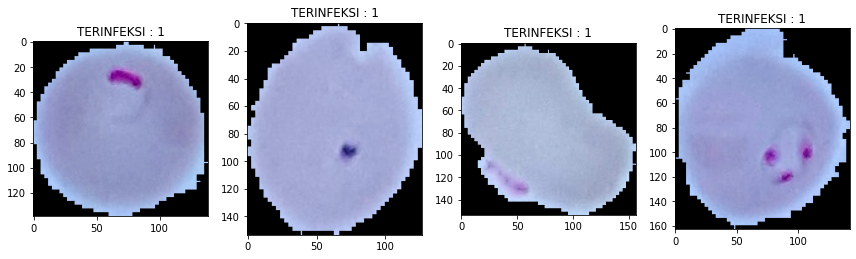

In [10]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/cell_images/Terinfeksi' + "/" + terinfeksi_data[i])
    plt.imshow(img)
    plt.title('TERINFEKSI : 1')
    plt.tight_layout()
plt.show()

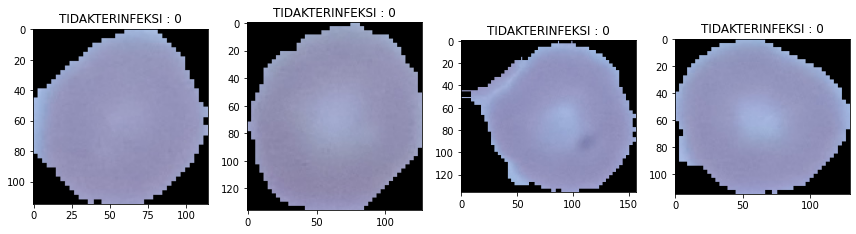

In [11]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/cell_images/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i+1])
    plt.imshow(img)
    plt.title('TIDAKTERINFEKSI : 0')
    plt.tight_layout()
plt.show()

In [0]:
data = []
labels = []
for img in terinfeksi_data:
    try:
        img_read = plt.imread('/content/drive/My Drive/Dataset/DATA5050/cell_images/Terinfeksi/' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in tidakTerinfeksi_data:
    try:
        img_read = plt.imread('/content/drive/My Drive/Dataset/DATA5050/cell_images/TidakTerinfeksi' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

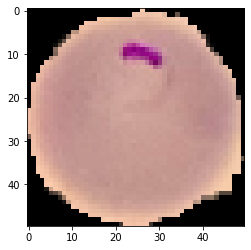

In [13]:
plt.imshow(data[0])
plt.show()

In [0]:
image_data = np.array(data)
labels = np.array(labels)

In [0]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [0]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [0]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (800, 50, 50, 3)
SHAPE OF TESTING IMAGE DATA : (200, 50, 50, 3)
SHAPE OF TRAINING LABELS : (800, 2)
SHAPE OF TESTING LABELS : (200, 2)


In [0]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers

In [0]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [0]:
#instantiate the model
height = 50
width = 50
classes = 2
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 32)       

In [0]:
#compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [0]:
#fit the model onto the dataset
h = model.fit(x_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
800/800 [==============================] - 5s 7ms/step - loss: 1.0544 - accuracy: 0.6263
Epoch 2/20
800/800 [==============================] - 1s 1ms/step - loss: 0.8209 - accuracy: 0.6938
Epoch 3/20
800/800 [==============================] - 1s 1000us/step - loss: 0.5738 - accuracy: 0.7800
Epoch 4/20
800/800 [==============================] - 1s 996us/step - loss: 0.4607 - accuracy: 0.7987
Epoch 5/20
800/800 [==============================] - 1s 1ms/step - loss: 0.3588 - accuracy: 0.8450
Epoch 6/20
800/800 [==============================] - 1s 997us/step - loss: 0.3842 - accuracy: 0.8500
Epoch 7/20
800/800 [==============================] - 1s 997us/step - loss: 0.3144 - accuracy: 0.8813
Epoch 8/20
800/800 [==============================] - 1s 997us/step - loss: 0.3143 - accuracy: 0.8813
Epoch 9/20
800/800 [==============================] - 1s 999us/step - loss: 0.2737 - accuracy: 0.8950
Epoch 10/20
800/800 [==============================] - 1s 992us/step - loss: 0.2509 - a

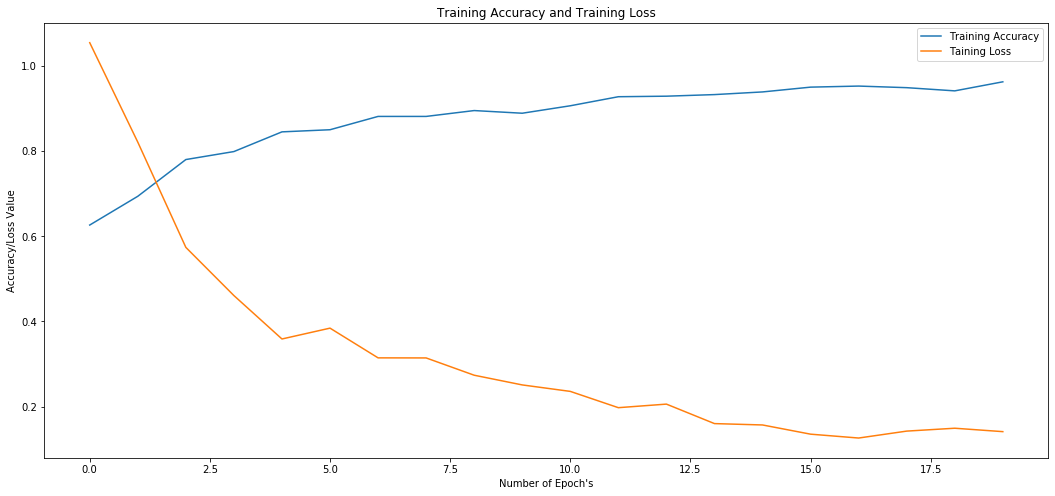

In [0]:
plt.figure(figsize = (18,8))
plt.plot(range(20), h.history['accuracy'], label = 'Training Accuracy')
plt.plot(range(20), h.history['loss'], label = 'Taining Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")

In [0]:
#evaluate the model on test data
predictions = model.evaluate(x_test, y_test)

200/200 [==============================] - 0s 2ms/step


In [0]:
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

LOSS : 2.9120075798034666
ACCURACY : 0.5550000071525574


In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  horizontal_flip = True,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  fill_mode = 'nearest',
                                  zoom_range = 0.3,
                                  rotation_range = 30)
val_datagen = ImageDataGenerator(rescale = 1/255.)

train_generator = train_datagen.flow(x_train, y_train, batch_size = 64, shuffle = False)
val_generator = val_datagen.flow(x_test, y_test, batch_size = 64, shuffle = False)

In [0]:
#calling the same model as above
model_aug = CNNbuild(height = height, width = width, classes = classes, channels = channels)

In [0]:
#compile the model
optim = optimizers.Adam(lr = 0.001, decay = 0.001 / 64)
model_aug.compile(loss = 'categorical_crossentropy', optimizer = optim, metrics = ['accuracy'])

In [0]:
#fit the model on the augmented dataset
h_aug = model_aug.fit_generator(train_generator, steps_per_epoch = len(x_train) // 64, epochs = 50)

Epoch 1/50
12/12 [==============================] - 2s 150ms/step - loss: 1.2439 - accuracy: 0.5547
Epoch 2/50
12/12 [==============================] - 1s 48ms/step - loss: 1.1175 - accuracy: 0.5966
Epoch 3/50
12/12 [==============================] - 1s 49ms/step - loss: 0.9802 - accuracy: 0.6263
Epoch 4/50
12/12 [==============================] - 1s 47ms/step - loss: 0.9512 - accuracy: 0.6264
Epoch 5/50
12/12 [==============================] - 1s 49ms/step - loss: 0.8502 - accuracy: 0.6114
Epoch 6/50
12/12 [==============================] - 1s 47ms/step - loss: 0.8927 - accuracy: 0.6060
Epoch 7/50
12/12 [==============================] - 1s 82ms/step - loss: 0.8040 - accuracy: 0.6495
Epoch 8/50
12/12 [==============================] - 1s 88ms/step - loss: 0.6888 - accuracy: 0.7005
Epoch 9/50
12/12 [==============================] - 1s 47ms/step - loss: 0.7178 - accuracy: 0.6960
Epoch 10/50
12/12 [==============================] - 1s 49ms/step - loss: 0.6707 - accuracy: 0.7135
Epoch 11

In [0]:
#evaluate the model on augmented test data
predict = model_aug.evaluate_generator(val_generator, steps = 5)

In [0]:
print(f'LOSS ON TEST DATA AFTER DATA AUGMENTATION : {predict[0]}')
print(f'ACCURACY ON TEST DATA AFTER DATA AUGMENTATION : {predict[1]}')

LOSS ON TEST DATA AFTER DATA AUGMENTATION : 3.563131809234619
ACCURACY ON TEST DATA AFTER DATA AUGMENTATION : 0.4886363744735718
